In [1]:
import multiprocessing

import numpy as np

import cnn
import utils
import hmm

Using TensorFlow backend.


In [2]:
cpus = multiprocessing.cpu_count() // 2

In [3]:
x = 2
y = np.array(['a', 'b', 'c'])
s = np.array([1.0, 0.0])

real_hmm_train = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.3, 0.7],
        [0.1, 0.9]
    ]),
    b=np.array([
        [0.6, 0.4, 0.0],
        [0.0, 0.0, 1.0]
    ]),
    s=s
)

real_hmm_val = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.5, 0.5],
        [0.2, 0.8]
    ]),
    b=np.array([
        [0.1, 0.7, 0.2],
        [0.8, 0.0, 0.2]
    ]),
    s=s
)

In [4]:
epoch_size = 100
batch_size = 100
seq_len = 20

train_data_gen = utils.HMMDataGenerator(
    real_hmm_train,
    epoch_size,
    batch_size,
    seq_len
)

val_data_gen = utils.HMMDataGenerator(
    real_hmm_val,
    epoch_size,
    batch_size,
    seq_len
)

In [5]:
model = cnn.CNNModel(train_data_gen.input_shape())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_1 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

In [6]:
epochs = 20

history = model.fit_generator(
    generator=train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 4s 40ms/step - loss: 0.6669 - accuracy: 0.6566 - val_loss: 0.7964 - val_accuracy: 0.4726
Epoch 2/20
100/100 [==============================] - 3s 25ms/step - loss: 0.5187 - accuracy: 0.8652 - val_loss: 1.3622 - val_accuracy: 0.4414
Epoch 3/20
100/100 [==============================] - 2s 23ms/step - loss: 0.3612 - accuracy: 0.8683 - val_loss: 2.1307 - val_accuracy: 0.4498
Epoch 4/20
100/100 [==============================] - 2s 22ms/step - loss: 0.2872 - accuracy: 0.8990 - val_loss: 2.6459 - val_accuracy: 0.4501
Epoch 5/20
100/100 [==============================] - 2s 23ms/step - loss: 0.2689 - accuracy: 0.8999 - val_loss: 3.0069 - val_accuracy: 0.4417
Epoch 6/20
100/100 [==============================] - 2s 23ms/step - loss: 0.2409 - accuracy: 0.9098 - val_loss: 3.2505 - val_accuracy: 0.4371
Epoch 7/20
100/100 [==============================] - 2s 24ms/step - loss: 0.2430 - accuracy: 0.9065 - val_loss: 2.3059 - val_accuracy: 0.4436

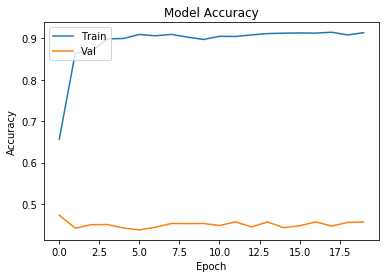

In [7]:
utils.plot_acc(history)

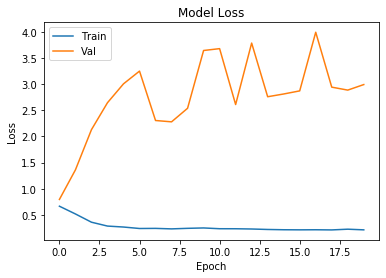

In [8]:
utils.plot_loss(history)

In [9]:
test_X = real_hmm_train.simulate(seq_len, reset_before=True)[1]
print(test_X)
test_X = np.array([train_data_gen._encode_hmm_outputs(test_X)])
print(test_X)

['a' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'b' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'b'
 'c' 'c']
[[[1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]]


In [10]:
p = model.predict(test_X)
print(p)

[[0.947094]]


In [11]:
pred_real = bool(round(p[0][0]))
print(f'Predict real?: {pred_real}')

Predict real?: True


In [12]:
model2 = cnn.CNNModel2(train_data_gen.input_shape())
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_4 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 4)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 7, 8)              104       
_________________________________________________________________
activation_5 (Activation)    (None, 7, 8)              0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [13]:
history2 = model2.fit_generator(
    generator=train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 3s 28ms/step - loss: 0.6233 - accuracy: 0.7840 - val_loss: 0.7406 - val_accuracy: 0.3988
Epoch 2/20
100/100 [==============================] - 2s 24ms/step - loss: 0.3330 - accuracy: 0.9024 - val_loss: 1.3994 - val_accuracy: 0.4032
Epoch 3/20
100/100 [==============================] - 3s 26ms/step - loss: 0.2216 - accuracy: 0.9105 - val_loss: 2.1351 - val_accuracy: 0.4240
Epoch 4/20
100/100 [==============================] - 2s 24ms/step - loss: 0.1806 - accuracy: 0.9265 - val_loss: 2.2773 - val_accuracy: 0.4218
Epoch 5/20
100/100 [==============================] - 3s 26ms/step - loss: 0.1828 - accuracy: 0.9267 - val_loss: 2.1714 - val_accuracy: 0.4352
Epoch 6/20
100/100 [==============================] - 2s 24ms/step - loss: 0.1712 - accuracy: 0.9323 - val_loss: 2.2334 - val_accuracy: 0.4451
Epoch 7/20
100/100 [==============================] - 2s 24ms/step - loss: 0.1579 - accuracy: 0.9367 - val_loss: 2.5217 - val_accuracy: 0.4436

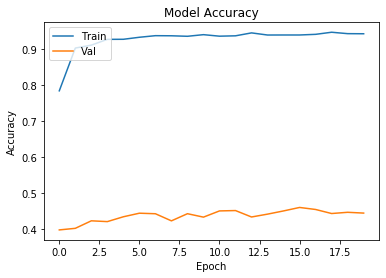

In [14]:
utils.plot_acc(history2)

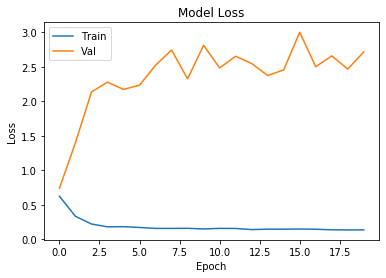

In [15]:
utils.plot_loss(history2)